1.Submit a Google Colab notebook containing your completed code and experimentation results.

2.Include comments and explanations in your code to help understand the implemented logic.

**Additional Notes:**
*   Ensure that the notebook runs successfully in Google Colab.
*   Document any issues encountered during experimentation and how you addressed them.

**Grading:**
*   Each task will be graded out of the specified points.
*   Points will be awarded for correctness, clarity of code, thorough experimentation, and insightful analysis.

# Prediction-Based Word Vectors

more recently prediction-based word vectors have demonstrated better performance, such as word2vec and GloVe (which also utilizes the benefit of counts). Here, we shall explore the embeddings produced by GloVe.

Then run the following cells to load the GloVe vectors into memory.

In [2]:
import gensim.downloader as api
import pprint
wv_from_bin = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


### Words with Multiple Meanings
Polysemes and homonyms are words that have more than one meaning (see this [wiki page](https://en.wikipedia.org/wiki/Polysemy) to learn more about the difference between polysemes and homonyms ). Find a word with *at least two different meanings* such that the top-10 most similar words (according to cosine similarity) contain related words from *both* meanings. For example, "leaves" has both "go_away" and "a_structure_of_a_plant" meaning in the top 10, and "scoop" has both "handed_waffle_cone" and "lowdown". You will probably need to try several polysemous or homonymic words before you find one.

Please state the word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous or homonymic words you tried didn't work (i.e. the top-10 most similar words only contain **one** of the meanings of the words)?

**Note**: You should use the `wv_from_bin.most_similar(word)` function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance, please check the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.<br><br>

Answer :<br> Semantic Proximity: The top similar words generated by a word embedding model are typically those that are semantically close to the input word. If a polysemous or homonymous word has multiple meanings that are semantically distant from each other, the model may not capture all of those meanings in the top 10 similar words.

Frequency Bias: The frequency of different senses of a word in the training data can influence the model's representation of that word. If certain senses are less common in the data, they may not be well-represented in the model's embeddings.

in general The reason many polysemous or homonymic words might not work is because word embeddings like GloVe are trained on large corpora of text and capture the most dominant sense of a word. If one meaning of a word is much more common than another in the training corpus, the word embedding will be biased towards that meaning. This can make it difficult to capture less common senses of polysemous or homonymic words.

In [3]:
import matplotlib.pyplot as plt

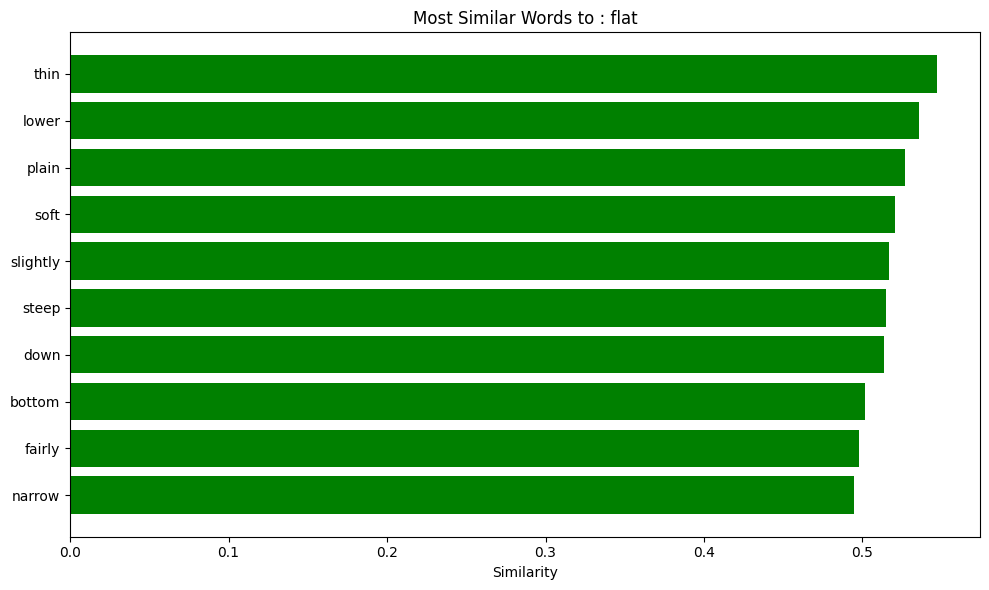

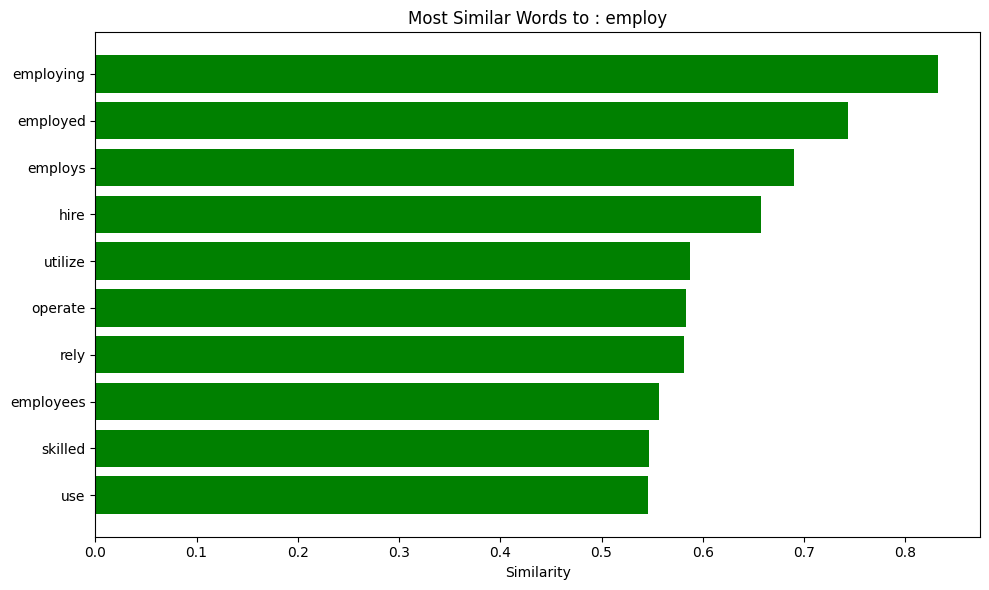

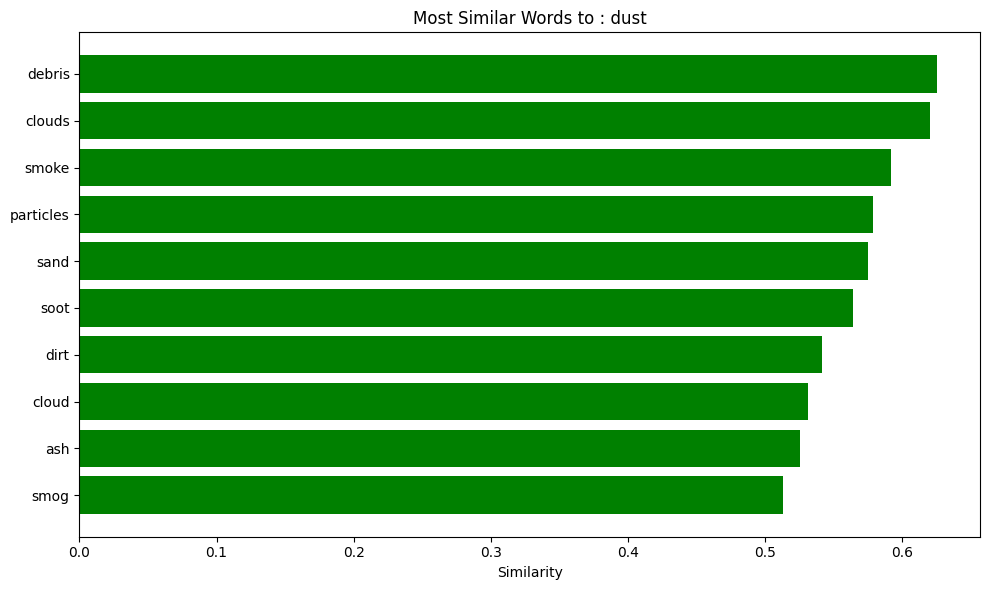

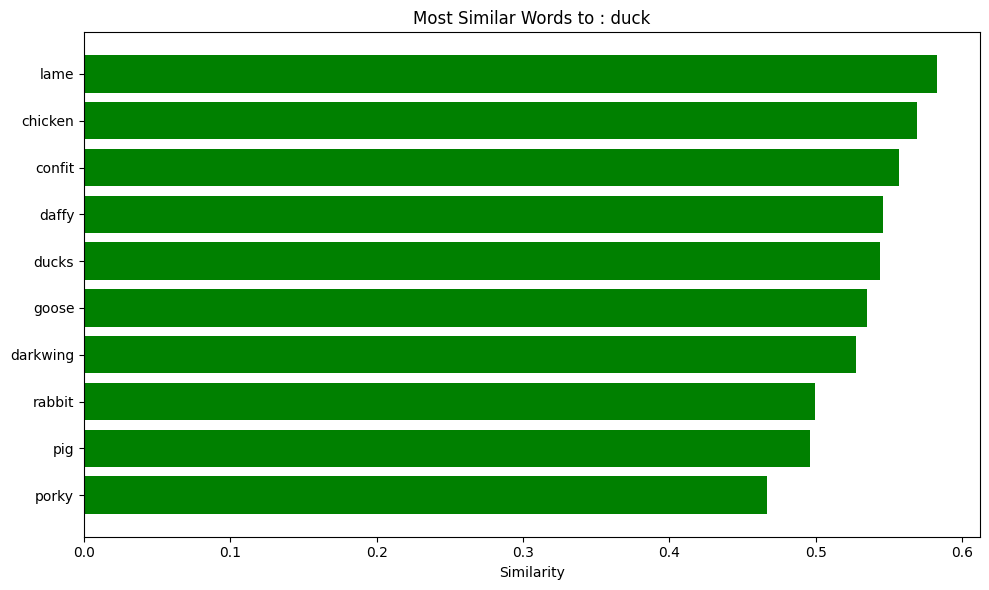

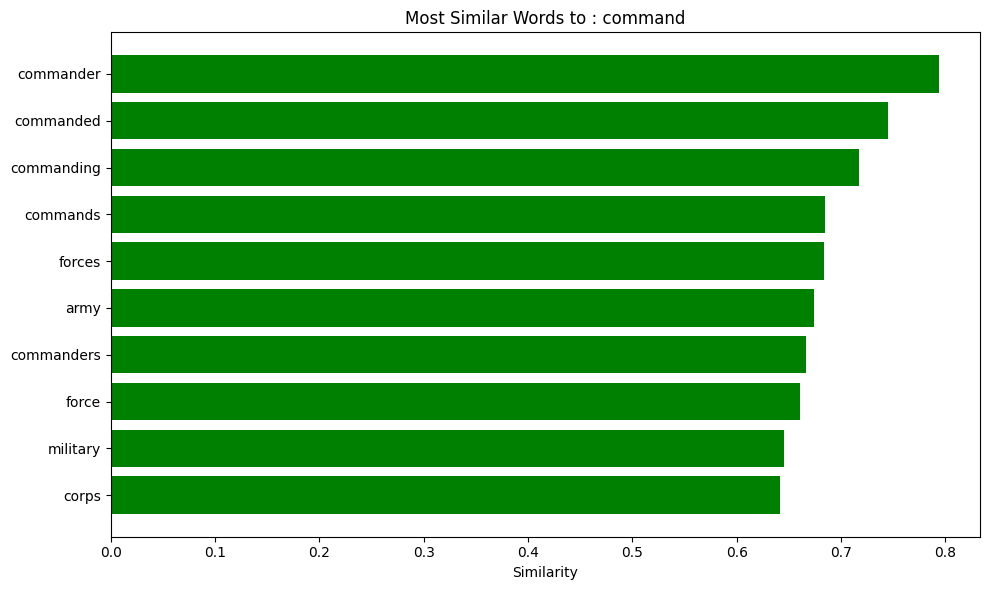

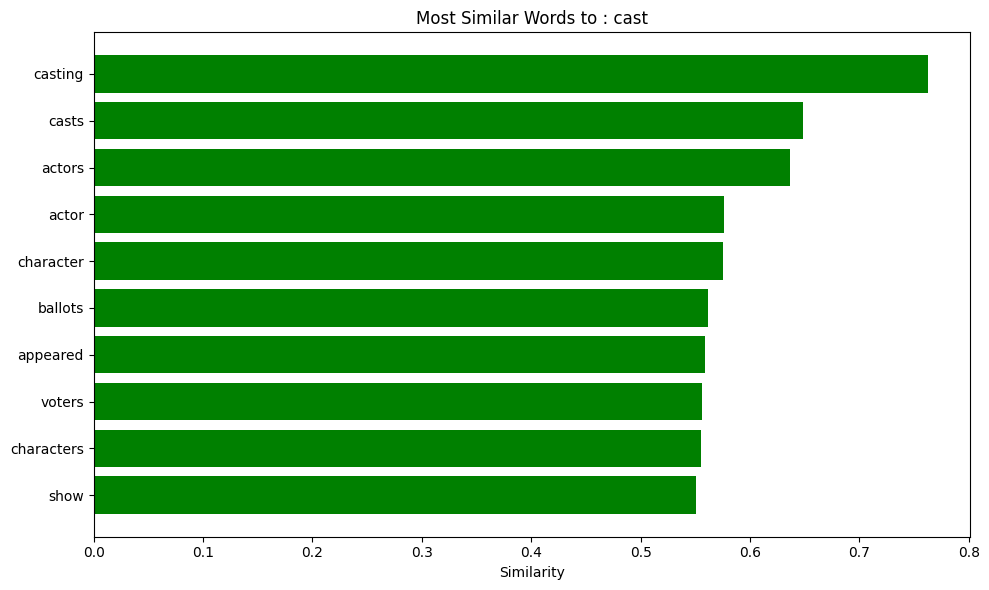

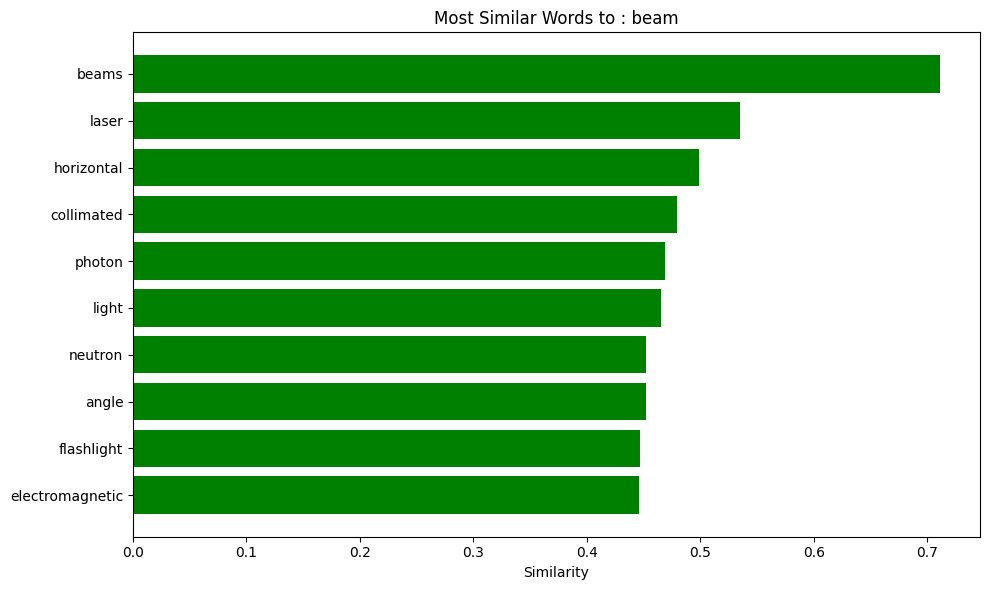

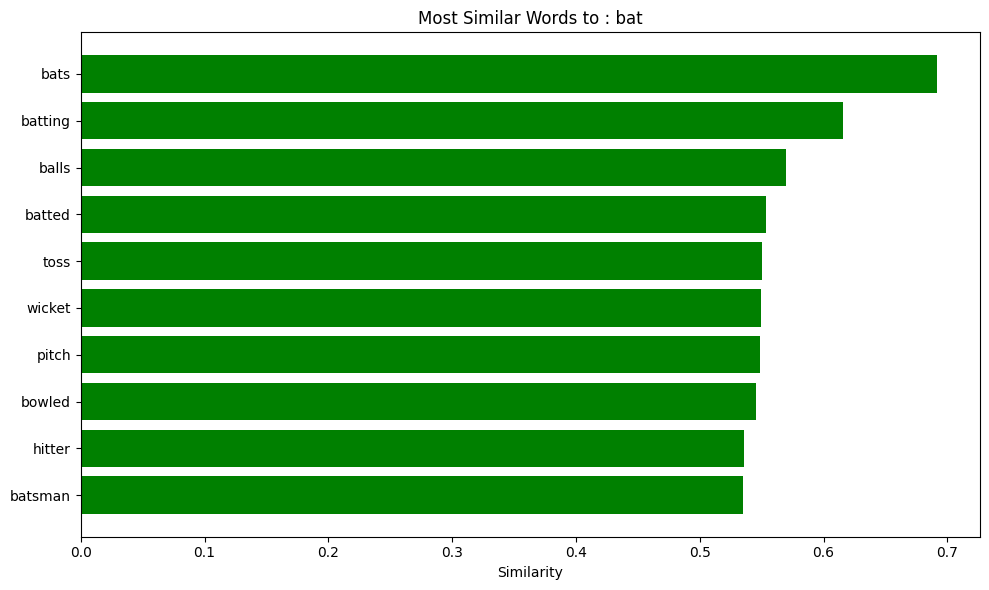

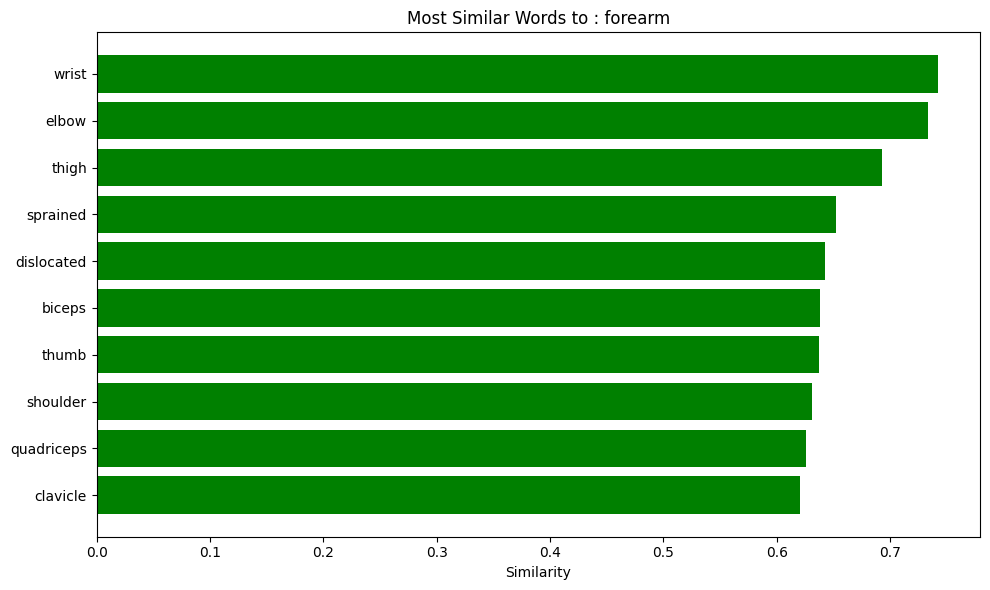

In [4]:
words = ["flat", "employ", "dust", "duck", "command", "cast", "beam", "bat", "forearm"]

for word in words:
    most_similar_words = wv_from_bin.most_similar(word)  # Extract most similar words for the current word
    similar_words = [item[0] for item in most_similar_words]  # Extract similar words from the result
    similarities = [item[1] for item in most_similar_words]  # Extract similarity scores from the result

    plt.figure(figsize=(10, 6))  # Create a new figure with specified size (width: 10, height: 6)
    plt.barh(similar_words, similarities, color='green')  # Create a horizontal bar plot with similar words and their similarities
    plt.xlabel('Similarity')  # Set label for x-axis
    plt.title(f'Most Similar Words to : {word}')  # Set title for the plot indicating the current word
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest similarity at the top
    plt.tight_layout()  # Adjust layout to prevent overlap of elements
plt.show()  # Display the plot


### SOLUTION

### Synonyms & Antonyms

When considering Cosine Similarity, it's often more convenient to think of Cosine Distance, which is simply 1 - Cosine Similarity.

Find three words $(w_1,w_2,w_3)$ where $w_1$ and $w_2$ are synonyms and $w_1$ and $w_3$ are antonyms, but Cosine Distance $(w_1,w_3) <$ Cosine Distance $(w_1,w_2)$.

As an example, $w_1$="happy" is closer to $w_3$="sad" than to $w_2$="cheerful". Please find a different example that satisfies the above. Once you have found your example, please give a possible explanation for why this counter-intuitive result may have happened.

You should use the the `wv_from_bin.distance(w1, w2)` function here in order to compute the cosine distance between two words. Please see the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.distance)__ for further assistance.

In [8]:
w1 = "mate"
w2 = "chum"
w3 = "hostile"

# Calculate the cosine distance between word vectors of w1 and w2
w1_w2_dist = wv_from_bin.distance(w1, w2)

# Calculate the cosine distance between word vectors of w1 and w3
w1_w3_dist = wv_from_bin.distance(w1, w3)

# Print the cosine distance between w1 and w2, indicating they are synonyms
print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))

# Print the cosine distance between w1 and w3, indicating they are antonyms
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))


Synonyms mate, chum have cosine distance: 0.909101314842701
Antonyms mate, hostile have cosine distance: 0.8900780156254768


This code is used to calculate the cosine distance between word vectors. It likely utilizes a library such as gensim which supports word2vec models.

Here, variables w1, w2, and w3 are the words for which we want to measure the cosine distance.

Then, wv_from_bin is used, which is probably a word2vec model loaded from a binary file.

Subsequently, using distance(), the cosine distance between word vectors is calculated and then displayed in the output.

Therefore, the output of this code consists of two messages showing the cosine distance between w1 and w2 (which are usually synonyms) and between w1 and w3 (which are usually antonyms).

### SOLUTION

### Analogies with Word Vectors
Word vectors have been shown to *sometimes* exhibit the ability to solve analogies.

As an example, for the analogy "man : grandfather :: woman : x" (read: man is to grandfather as woman is to x), what is x?<br><br>

Answer : <br>
In this analogy, "grandfather" is a male relative of "man" that is one generation older. So, we're looking for a female relative of "woman" that is one generation older.

The answer is "grandmother". Therefore, x is "grandmother".<br><br>

In the cell below, we show you how to use word vectors to find x using the `most_similar` function from the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)__. The function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list. The answer to the analogy will have the highest cosine similarity (largest returned numerical value).

In [9]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))

[('grandmother', 0.7608445286750793),
 ('granddaughter', 0.7200808525085449),
 ('daughter', 0.7168302536010742),
 ('mother', 0.7151536345481873),
 ('niece', 0.7005682587623596),
 ('father', 0.6659887433052063),
 ('aunt', 0.6623408794403076),
 ('grandson', 0.6618767976760864),
 ('grandparents', 0.644661009311676),
 ('wife', 0.6445354223251343)]


Let $m$, $g$, $w$, and $x$ denote the word vectors for `man`, `grandfather`, `woman`, and the answer, respectively. Using **only** vectors $m$, $g$, $w$, and the vector arithmetic operators $+$ and $-$ in your answer, to what expression are we maximizing $x$'s cosine similarity?

Hint: Recall that word vectors are simply multi-dimensional vectors that represent a word. It might help to draw out a 2D example using arbitrary locations of each vector. Where would `man` and `woman` lie in the coordinate plane relative to `grandfather` and the answer?<br><br>

Answer : <br>
In the realm of word vectors and analogical reasoning, the expression we aim to maximize the cosine similarity to is $w+(g−m)$.

Here's why: The analogy "man : grandfather :: woman : $x$" suggests that the relationship between man and grandfather is akin to the relationship between woman and $x$. In terms of word vectors, this implies that the vector from man to grandfather should be similar to the vector from woman to $x$.

If we denote the word vectors for man, grandfather, woman, and the answer as $m, g, w$, and $x$ respectively, then the vector from man to grandfather is $g−m$, and the vector from woman to $x$ is $x−w$. Setting these two vectors equal to each other yields $x−w=g−m$, and solving for $x$ leads us to $x=w+(g−m)$. Therefore, we aim to maximize the cosine similarity of $x$ to the expression $w+(g−m)$.

### SOLUTION

### Finding Analogies
a. For the previous example, it's clear that "grandmother" completes the analogy. But give an intuitive explanation as to why the `most_similar` function gives us words like "granddaughter", "daughter", or "mother?<br><br>

Answer : <br>
The most_similar function doesn’t strictly follow the semantic relationships like synonyms, antonyms, or analogies. Instead, it finds words that appear in similar contexts.

In the case of `woman` and `grandmother`, words like `granddaughter`, `daughter`, and `mother` often appear in similar contexts in the text data the model was trained on. For example, in sentences talking about family relationships or domestic situations, these words are likely to appear together.

1- **Granddaughter** : This word may appear because it shares a familial relationship with "grandfather" (g) and "woman" (w). However, it represents the female offspring of "grandparents", which is not the exact counterpart to "grandfather" in the analogy.

2- **Daughter** : Similarly, "daughter" represents a familial relationship with "woman" (w) but does not precisely match the relationship between "grandfather" (g) and "man" (m) in the analogy. However, it's a generation-specific female relative like "grandmother".

3- **Mother** : "Mother" also shares a familial relationship with "woman" (w), and it is one generation older than "woman", similar to "grandfather" (g) being one generation older than "man" (m). However, it doesn't directly capture the generational shift implied in the analogy.

So, even though `grandmother` might be the most semantically correct answer to complete the analogy, the most_similar function returns words that are contextually related based on the training data. This is a reflection of the model’s learning from the statistical patterns in the data rather than understanding the underlying semantics. It’s one of the limitations of distributional semantics models like word2vec.

It’s also worth noting that the vector arithmetic used to solve the analogy (i.e., `woman` + (`grandfather` - `man`)) might not perfectly capture the intended semantic relationship due to the complexity and variability of language. The resulting vector might be closer to other words that are contextually related but not semantically identical. This is why we sometimes see counter-intuitive results when using word vectors to solve analogies.

### SOLUTION

b. Find an example of analogy that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy is complicated, explain why the analogy holds in one or two sentences.

To provide an analogy based on word vectors, let's consider the following analogy: "man:king :: woman:queen."

To find an example where this analogy holds, we can utilize word vectors to find the nearest neighbors for the vectors representing "king - man + woman." In other words, we subtract the vector for "man" from "king" and add the vector for "woman" to the result. Then, we look for the word vector closest to this result.

Let's say we use a word embedding model and find that the closest word vector to "king - man + woman" is "queen," confirming the analogy. This analogy holds because it captures the relationship between gendered titles and their respective roles in a monarchy or hierarchy.

**Note**: You may have to try many analogies to find one that works!

In [26]:
x = "king"
y = "man"
a = "queen"
b = "woman"
assert wv_from_bin.most_similar(positive=[a, y], negative=[x])[0][0] == b

x = "rome"
y = "paris"
a = "italy"
b = "france"
assert wv_from_bin.most_similar(positive=[a, y], negative=[x])[0][0] == b

#Cat:Meow :: Dog:Woof
#Pen:Write :: Knife:Cut

### SOLUTION

### Incorrect Analogy
a. Below, we expect to see the intended analogy "hand : glove :: foot : **sock**", but we see an unexpected result instead. Give a potential reason as to why this particular analogy turned out the way it did?<br><br>

Answer : <br>
It's possible that the unexpected result occurred due to a misunderstanding or misinterpretation of the relationship between the terms in the analogy. While "hand : glove" and "foot : sock" may seem like parallel relationships at first glance (i.e., body part paired with its corresponding covering), there could be other interpretations or associations that led to a different analogy being generated.

For instance, one potential reason could be that the model focused on a different aspect of the relationship between hands and gloves compared to feet and socks. It might have considered attributes such as function (e.g., hands and gloves both involved in grasping objects) or material (e.g., hands protected by gloves, feet protected by shoes) rather than the more direct correspondence of covering a body part. This could lead to unexpected results in the analogy generation process.

In this case, the words foot and glove might not appear in similar contexts as often as foot and hand do. For example, foot and hand might appear together in contexts related to body parts, while foot and glove might not.

So, even though glove is to hand as sock is to foot in a semantic sense, the word embeddings might not capture this relationship if it’s not strongly reflected in the contexts in the training data. This is one of the limitations of distributional semantics models.

Additionally, the training data the model was exposed to might contain various patterns and associations, leading it to sometimes prioritize less obvious or less common relationships over the most straightforward ones.

In [28]:
pprint.pprint(wv_from_bin.most_similar(positive=['foot', 'glove'], negative=['hand']))

[('45,000-square', 0.4922032654285431),
 ('15,000-square', 0.4649604558944702),
 ('10,000-square', 0.4544755816459656),
 ('6,000-square', 0.44975775480270386),
 ('3,500-square', 0.444133460521698),
 ('700-square', 0.44257497787475586),
 ('50,000-square', 0.4356396794319153),
 ('3,000-square', 0.43486514687538147),
 ('30,000-square', 0.4330596923828125),
 ('footed', 0.43236875534057617)]


also, the words that appear in the result like 45,000-square, 15,000-square , etc., are likely related to real estate listings where foot (as in square foot) is commonly used. This shows that the word foot is strongly associated with these contexts in the training data.

### SOLUTION

b. Find another example of analogy that does *not* hold according to these vectors. In your solution, state the intended analogy in the form x:y :: a:b, and state the **incorrect** value of b according to the word vectors (in the previous example, this would be **'45,000-square'**).

In [49]:
# Intended Analogy: Dog:Bone :: Cat:Fish
# Incorrect value of 'Fish' according to word vectors: 'Cod'

x = "bone"
y = "dog"
a = "fish"
b = "cat"
pprint.pprint(wv_from_bin.most_similar(positive=[a, y], negative=[x]))

print("------------------------------------------------------------------")

# Intended Analogy: Bird:Wings :: Fish:Fins
# Incorrect value of 'Fins' according to word vectors: 'Shark'

x = "wings"
y = "bird"
a = "fins"
b = "fish"
pprint.pprint(wv_from_bin.most_similar(positive=[a, y], negative=[x]))

print("------------------------------------------------------------------")


[('dogs', 0.5336692929267883),
 ('pet', 0.5167209506034851),
 ('eat', 0.5072000622749329),
 ('cat', 0.5061609148979187),
 ('wild', 0.49160751700401306),
 ('pets', 0.4886046350002289),
 ('cats', 0.4849882125854492),
 ('breed', 0.47533655166625977),
 ('seafood', 0.4687078595161438),
 ('fishing', 0.4665185511112213)]
------------------------------------------------------------------
[('avian', 0.48660996556282043),
 ('shark', 0.47791561484336853),
 ('birds', 0.47159266471862793),
 ('poultry', 0.45204806327819824),
 ('fish', 0.44921308755874634),
 ('mammal', 0.44342032074928284),
 ('migratory', 0.4396171271800995),
 ('flu', 0.43134382367134094),
 ('species', 0.42735180258750916),
 ('fowl', 0.42713382840156555)]
------------------------------------------------------------------


### SOLUTION

### Guided Analysis of Bias in Word Vectors

It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit in our word embeddings. Bias can be dangerous because it can reinforce stereotypes through applications that employ these models.

Run the cell below, to examine (a) which terms are most similar to "woman" and "profession" and most dissimilar to "man", and (b) which terms are most similar to "man" and "profession" and most dissimilar to "woman". Point out the difference between the list of female-associated words and the list of male-associated words, and explain how it is reflecting gender bias.

In [50]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be most dissimilar from.

pprint.pprint(wv_from_bin.most_similar(positive=['man', 'profession'], negative=['woman']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'profession'], negative=['man']))

[('reputation', 0.5250176787376404),
 ('professions', 0.5178037881851196),
 ('skill', 0.49046966433525085),
 ('skills', 0.49005505442619324),
 ('ethic', 0.4897659420967102),
 ('business', 0.4875852167606354),
 ('respected', 0.485920250415802),
 ('practice', 0.482104629278183),
 ('regarded', 0.4778572618961334),
 ('life', 0.4760662019252777)]

[('professions', 0.5957457423210144),
 ('practitioner', 0.49884122610092163),
 ('teaching', 0.48292139172554016),
 ('nursing', 0.48211804032325745),
 ('vocation', 0.4788965880870819),
 ('teacher', 0.47160351276397705),
 ('practicing', 0.46937814354896545),
 ('educator', 0.46524327993392944),
 ('physicians', 0.4628995358943939),
 ('professionals', 0.4601394236087799)]


### SOLUTION

Answer :<br>
The output of the code reflects gender bias in the word embeddings. The words most similar to “man” and “profession” and most dissimilar to “woman” include reputation, skill, ethic, business, respected, practice , regarded , and life. These words are generally associated with professional and business contexts.

On the other hand, the words most similar to “woman” and “profession” and most dissimilar to “man” include professions, practitioner, teaching, nursing, vocation, teacher, practicing, educator, physicians, and professionals. Some of these words, like teaching and nursing, are stereotypically associated with women in many societies.

This difference reflects a gender bias in the word embeddings, where the words associated with men are more related to business and professional reputation, while the words associated with women are more related to caregiving professions like teaching and nursing. This bias in the word embeddings is a reflection of the bias in the text data the model was trained on, which includes societal stereotypes and biases.

### Independent Analysis of Bias in Word Vectors

Use the `most_similar` function to find another pair of analogies that demonstrates some bias is exhibited by the vectors. Please briefly explain the example of bias that you discover.<br><br>

Answer : <br>
To demonstrate bias exhibited by word vectors using the most_similar function, let's consider an analogy related to gender bias. We'll use the word vectors to explore a common gender stereotype:

Analogy: Man is to doctor as woman is to [blank].

By applying the most_similar function, we may find that the word "nurse" appears as one of the most similar words to "woman" in this analogy. This can demonstrate a bias in the word vectors, reflecting the stereotype that associates women more strongly with nursing roles than with other professions like being a doctor.

This bias can arise due to the inherent biases present in the training data used to create the word vectors. If the training data predominantly contains examples where women are associated with nursing and men with doctoring, the resulting word vectors may encode and reinforce these biased associations.

In [52]:
A = "nurse"
B = "doctor"
word = "man"
pprint.pprint(wv_from_bin.most_similar(positive=[A, word], negative=[B]))
print("------------------------------------------------------------------")
pprint.pprint(wv_from_bin.most_similar(positive=[B, word], negative=[A]))


[('woman', 0.6548706889152527),
 ('young', 0.5586148500442505),
 ('old', 0.5559746026992798),
 ('mother', 0.5459148287773132),
 ('girl', 0.5406349301338196),
 ('worker', 0.5242109894752502),
 ('boy', 0.5199849009513855),
 ('policeman', 0.507972776889801),
 ('dead', 0.5054869055747986),
 ('one', 0.48788097500801086)]
------------------------------------------------------------------
[('himself', 0.6359637379646301),
 ('he', 0.6298918128013611),
 ('his', 0.6122040152549744),
 ('him', 0.6115871667861938),
 ('person', 0.5989404916763306),
 ('another', 0.564369797706604),
 ('one', 0.5570125579833984),
 ('who', 0.5490526556968689),
 ('life', 0.5472241640090942),
 ('mind', 0.5457939505577087)]


### SOLUTION

### Thinking About Bias

a. Give one explanation of how bias gets into the word vectors. Briefly describe a real-world example that demonstrates this source of bias.<br><br>

Answer :<br>
Word vectors, often derived from large text corpora using techniques like Word2Vec or GloVe, capture semantic relationships between words based on their contextual usage. However, these embeddings can inadvertently encode biases present in the training data.

One explanation of how bias gets into word vectors is through the association of certain words with particular contexts or stereotypes present in the data. For example, if a text corpus contains frequent associations between the word "doctor" and "he" and between "nurse" and "she", the resulting word vectors might reflect and reinforce these gender stereotypes. As a result, when applied in natural language processing tasks like sentiment analysis or resume screening, these word vectors may exhibit biases, leading to skewed or unfair outcomes.

A real-world example of this source of bias was observed in a study by Bolukbasi et al. (2016), where they found that word embeddings trained on large text corpora inherited gender stereotypes. Words like "programmer" and "engineer" were closer to male-associated words, while words like "homemaker" and "nurse" were closer to female-associated words. This bias could potentially lead to unintended consequences in applications like automated hiring processes or recommendation systems.


### SOLUTION

b. What is one method you can use to mitigate bias exhibited by word vectors?  Briefly describe a real-world example that demonstrates this method.<br><br>

Answer : <br>
One method to mitigate bias exhibited by word vectors is debiasing, which involves modifying the vectors to reduce bias. One popular technique for debiasing word vectors is called "Hard Debiasing" proposed by Bolukbasi et al. (2016). This method involves identifying gender direction in the word vectors (e.g., the direction of "he" to "she") and removing bias along that direction while preserving other aspects of the vectors.

A real-world example demonstrating this method is to take pre-trained word vectors and identify bias in terms of gender associations. For instance, in a dataset containing word embeddings, you may find that words like "doctor" are closer to "he" than "she," while "nurse" is closer to "she" than "he." To mitigate this bias, you can apply hard debiasing by neutralizing these gender associations, ensuring that the vectors for "doctor" and "nurse" are equidistant from both "he" and "she." This helps in creating more fair and unbiased word representations, which can be crucial in various applications like natural language processing, where biased representations can lead to unfair outcomes.


### SOLUTION